In [ ]:
import numpy as np
import dask
import xarray as xr
from time import sleep

# Dask delayed basics

### Adapted from dask examples at https://github.com/dask/dask-tutorial

In [2]:
def double(x):
    sleep(1)
    return x * 2

def add(x, y, z):
    sleep(1)
    return x + y + z

In [3]:
%%time
# This takes 4 seconds to run because we call each
# function sequentially, one after the other

x = double(1)
y = double(2)
z = double(3)
result = add(x, y, z)

Wall time: 4 s


In [4]:
%%time
# This runs immediately, all it does is build a graph of tasks

x = dask.delayed(double)(1)
y = dask.delayed(double)(2)
z = dask.delayed(double)(3)
result = dask.delayed(add)(x, y, z)

Wall time: 997 µs


In [5]:
result #the result isn't a 'result' yet, just a delayed 'promise' for work to be computed later

Delayed('add-ab44117a-2604-463e-bd7e-e4e7c5320497')

In [6]:
%%time
# This actually runs our computation using a local thread pool
# Since some tasks can run in parallel, it is faster
result.compute()

Wall time: 2.01 s


12

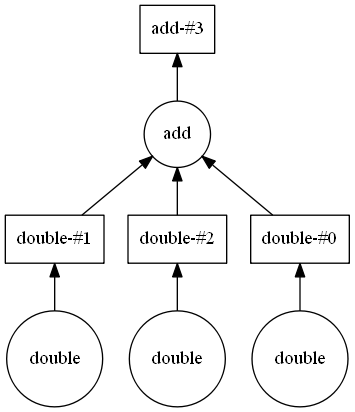

In [7]:
result.visualize()

In [11]:
#Try to create a for loop that doubles even numbers, and triples the odds

@dask.delayed
def double(x):
    sleep(.5)
    return x * 2

@dask.delayed
def triple(x):
    sleep(1)
    return x * 3

input_data = range(10)

In [12]:
%%time 
result = []
for value in input_data:
    if value % 2 == 0:
        result.append(double(value))
    else:
        result.append(triple(value))
dask.compute(*result)

Wall time: 1.5 s


# Dask array 
### Builds on the familar numpy ndarray

In [13]:
import dask.array as da

In [14]:
array = np.random.normal(size=1000)

In [16]:
array.mean()

0.0651724590624334

In [15]:
dask_array = da.from_array(array, chunks=(1000,)) #create a dask array from a np array

In [17]:
dask_array.mean() # Doesn't compute the result yet!

dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=()>

In [18]:
dask_array.mean().compute()

0.0651724590624334

In [19]:
result = da.random.random((100000000,100), chunks=(500000,100)).mean(axis=0).compute()
print(result.shape)
print(result)

(100,)
[0.49995575 0.5000379  0.49996526 0.49994592 0.49999757 0.50003598
 0.5000517  0.49997259 0.50001866 0.49994768 0.50001113 0.5000348
 0.50002569 0.49999603 0.50001212 0.49996195 0.50002126 0.50003144
 0.50002932 0.4999906  0.49999413 0.50000075 0.50001321 0.4999506
 0.50003644 0.49996247 0.5000165  0.49995529 0.49999526 0.50000983
 0.49998678 0.49997846 0.50000514 0.50000543 0.49997474 0.49999501
 0.49995659 0.49999664 0.49996686 0.49999603 0.50003774 0.50000865
 0.49995132 0.49999564 0.500019   0.50002976 0.4999881  0.49998873
 0.50001848 0.50002027 0.50001178 0.49998736 0.50002423 0.50003471
 0.50004922 0.49997949 0.50002882 0.50001165 0.49991808 0.49998519
 0.49998151 0.49996193 0.4999878  0.50001218 0.4999675  0.50001565
 0.50001915 0.49999597 0.5000521  0.50001259 0.49998791 0.50001246
 0.49995537 0.49998487 0.49998704 0.4999761  0.50001475 0.50004626
 0.49997887 0.49999967 0.49999797 0.50002777 0.49998188 0.49996494
 0.50000096 0.4999696  0.50004119 0.49995323 0.50002001 0

In [20]:
(100000000*100)*result[0].nbytes/(1024**3) #GB size of array we just processed!

74.50580596923828

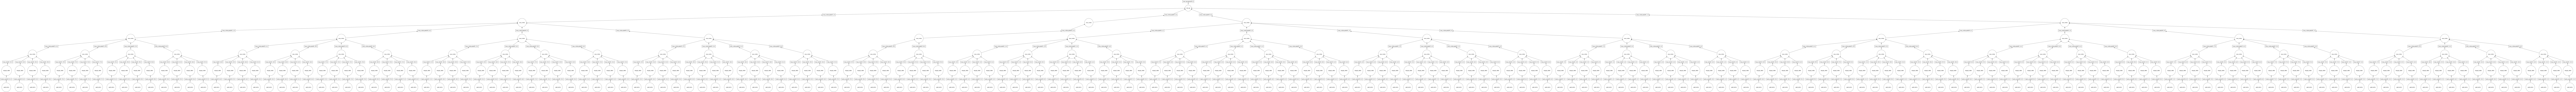

In [23]:
dask.visualize(da.random.random((100000000,100), chunks=(500000,100)).mean(axis=0))

## Dask also builds on pandas dataframes and xarray! 

## Go read the [dask docs](http://docs.dask.org/en/latest/), and the [dask tutorial](https://github.com/dask/dask-tutorial)